In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.utils import  image_dataset_from_directory

In [2]:
picture_size = 48
folder_path = "images/images/"

# display images

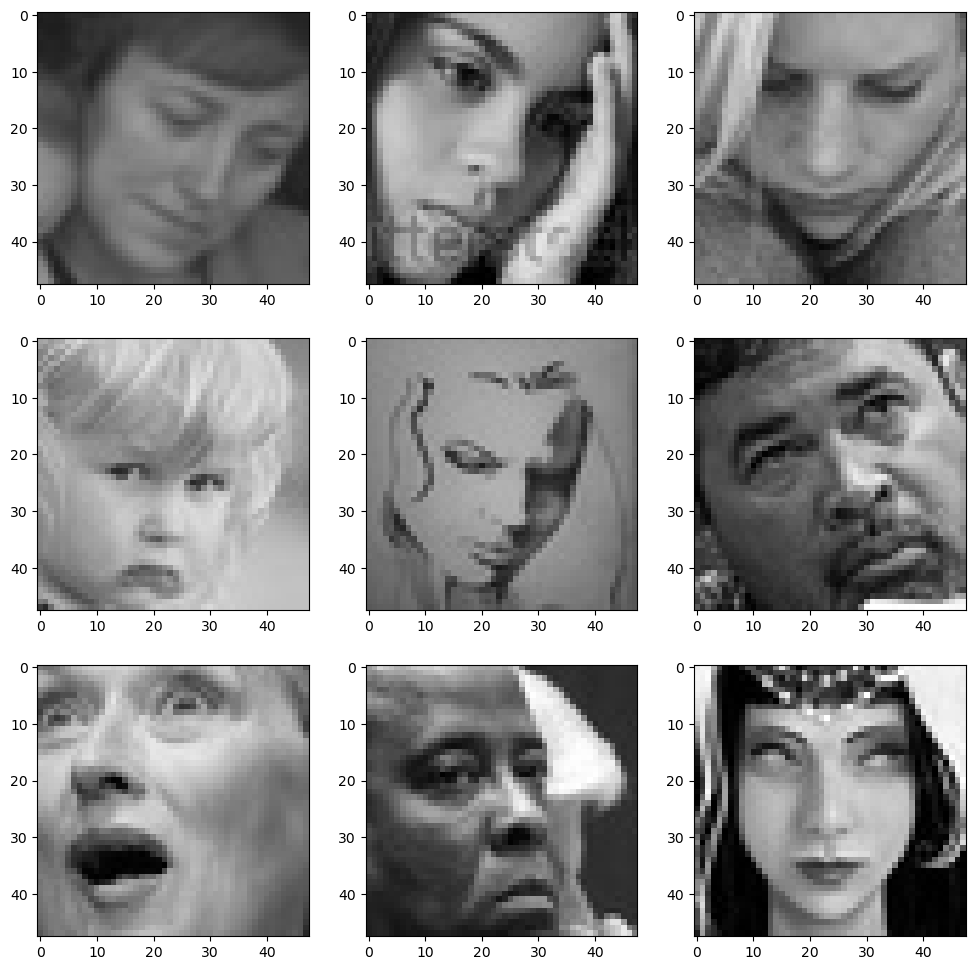

In [3]:
expression = 'sad'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i] )
    plt.imshow(img)

plt.show()

# load images

In [4]:
from tensorflow.keras.utils import  image_dataset_from_directory
train_set = image_dataset_from_directory(
    folder_path+"train",
    image_size=(48,48),
    batch_size=128,
    color_mode='grayscale',
    label_mode="categorical",
    class_names=['angry','disgust','fear','happy','neutral', 'sad', 'surprise']
)
test_set = image_dataset_from_directory(
    folder_path+"validation",
    image_size=(48,48),
    batch_size=128,
    color_mode='grayscale',
    label_mode="categorical",
    class_names=['angry','disgust','fear','happy','neutral', 'sad', 'surprise']
)

Found 28821 files belonging to 7 classes.
Found 7066 files belonging to 7 classes.


In [5]:
n_classes = 7
#layer 0
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#layer 1
model.add(Conv2D(64,(4,4),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#layer 2
model.add(Conv2D(128,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#layer 3
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#layer 4
model.add(Conv2D(512,(3,3),padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
#FC Layer 1
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
#FC Layer 2
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(n_classes,activation='softmax'))
opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        3

In [8]:

from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("modelnew2.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]


model.compile(loss='categorical_crossentropy',
             optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [10]:


history = model.fit(train_set, validation_data = test_set, epochs = 50,callbacks=callbacks_list)


Epoch 1/50
226/226 [==============================] - ETA: 0s - loss: 1.7494 - accuracy: 0.3020WARNING:tensorflow:Can save best model only with val_acc available, skipping.


226/226 [==============================] - 416s 2s/step - loss: 1.7494 - accuracy: 0.3020 - val_loss: 1.5829 - val_accuracy: 0.3981 - lr: 0.0010
Epoch 2/50
226/226 [==============================] - ETA: 0s - loss: 1.5006 - accuracy: 0.4199WARNING:tensorflow:Can save best model only with val_acc available, skipping.


226/226 [==============================] - 485s 2s/step - loss: 1.5006 - accuracy: 0.4199 - val_loss: 1.5864 - val_accuracy: 0.4196 - lr: 0.0010
Epoch 3/50
226/226 [==============================] - ETA: 0s - loss: 1.3570 - accuracy: 0.4789WARNING:tensorflow:Can save best model only with val_acc available, skipping.


226/226 [==============================] - 543s 2s/step - loss: 1.3570 - accuracy: 0.4789 - val_loss: 1.3459 - val_accuracy: 0.4980 - lr: 0.0010
Epoch 4/50
226/226 [==============================] - ETA: 0s - loss: 1.2663 - accuracy: 0.5203WARNING:tensorflow:Can save best model only with val_acc available, skipping.


226/226 [==============================] - 493s 2s/step - loss: 1.2663 - accuracy: 0.5203 - val_loss: 1.2720 - val_accuracy: 0.5212 - lr: 0.0010
Epoch 5/50
226/226 [==============================] - ETA: 0s - loss: 1.2107 - accuracy: 0.5388 WARNING:tensorflow:Can save best model only with val_acc available, skipping.


226/226 [==============================] - 3183s 14s/step - loss: 1.2107 - accuracy: 0.5388 - val_loss: 1.2890 - val_accuracy: 0.5219 - lr: 0.0010
Epoch 6/50
226/226 [==============================] - ETA: 0s - loss: 1.1645 - accuracy: 0.5552WARNING:tensorflow:Can save best model only with val_acc available, skipping.


226/226 [==============================] - 493s 2s/step - loss: 1.1645 - accuracy: 0.5552 - val_loss: 1.3489 - val_accuracy: 0.5076 - lr: 0.0010
Epoch 7/50
226/226 [==============================] - ETA: 0s - loss: 1.1208 - accuracy: 0.5743WARNING:tensorflow:Can save best model only with val_acc available, skipping.


226/226 [==============================] - 499s 2s/step - loss: 1.1208 - accuracy: 0.5743 - val_loss: 1.2428 - val_accuracy: 0.5396 - lr: 0.0010
Epoch 8/50
226/226 [==============================] - ETA: 0s - loss: 1.0916 - accuracy: 0.5887WARNING:tensorflow:Can save best model only with val_acc available, skipping.


226/226 [==============================] - 1103s 5s/step - loss: 1.0916 - accuracy: 0.5887 - val_loss: 1.1978 - val_accuracy: 0.5494 - lr: 0.0010
Epoch 9/50
226/226 [==============================] - ETA: 0s - loss: 1.0516 - accuracy: 0.6010WARNING:tensorflow:Can save best model only with val_acc available, skipping.


226/226 [==============================] - 504s 2s/step - loss: 1.0516 - accuracy: 0.6010 - val_loss: 1.0721 - val_accuracy: 0.5979 - lr: 0.0010
Epoch 10/50
226/226 [==============================] - ETA: 0s - loss: 1.0282 - accuracy: 0.6114WARNING:tensorflow:Can save best model only with val_acc available, skipping.


226/226 [==============================] - 495s 2s/step - loss: 1.0282 - accuracy: 0.6114 - val_loss: 1.1851 - val_accuracy: 0.5545 - lr: 0.0010
Epoch 11/50
226/226 [==============================] - ETA: 0s - loss: 0.9954 - accuracy: 0.6233 WARNING:tensorflow:Can save best model only with val_acc available, skipping.


226/226 [==============================] - 2290s 10s/step - loss: 0.9954 - accuracy: 0.6233 - val_loss: 1.0641 - val_accuracy: 0.6083 - lr: 0.0010
Epoch 12/50
226/226 [==============================] - ETA: 0s - loss: 0.9608 - accuracy: 0.6355WARNING:tensorflow:Can save best model only with val_acc available, skipping.


226/226 [==============================] - 485s 2s/step - loss: 0.9608 - accuracy: 0.6355 - val_loss: 1.2556 - val_accuracy: 0.5539 - lr: 0.0010
Epoch 13/50
226/226 [==============================] - ETA: 0s - loss: 0.9374 - accuracy: 0.6495WARNING:tensorflow:Can save best model only with val_acc available, skipping.


226/226 [==============================] - 327s 1s/step - loss: 0.9374 - accuracy: 0.6495 - val_loss: 1.0624 - val_accuracy: 0.6057 - lr: 0.0010
Epoch 14/50
226/226 [==============================] - ETA: 0s - loss: 0.9065 - accuracy: 0.6627WARNING:tensorflow:Can save best model only with val_acc available, skipping.


226/226 [==============================] - 286s 1s/step - loss: 0.9065 - accuracy: 0.6627 - val_loss: 1.0612 - val_accuracy: 0.6187 - lr: 0.0010
Epoch 15/50
226/226 [==============================] - ETA: 0s - loss: 0.8799 - accuracy: 0.6716WARNING:tensorflow:Can save best model only with val_acc available, skipping.


226/226 [==============================] - 200s 883ms/step - loss: 0.8799 - accuracy: 0.6716 - val_loss: 1.1004 - val_accuracy: 0.6020 - lr: 0.0010
Epoch 16/50
226/226 [==============================] - ETA: 0s - loss: 0.8577 - accuracy: 0.6772WARNING:tensorflow:Can save best model only with val_acc available, skipping.


226/226 [==============================] - 208s 917ms/step - loss: 0.8577 - accuracy: 0.6772 - val_loss: 1.0609 - val_accuracy: 0.6141 - lr: 0.0010
Epoch 17/50
226/226 [==============================] - ETA: 0s - loss: 0.8206 - accuracy: 0.6945WARNING:tensorflow:Can save best model only with val_acc available, skipping.


226/226 [==============================] - 206s 910ms/step - loss: 0.8206 - accuracy: 0.6945 - val_loss: 1.1043 - val_accuracy: 0.6005 - lr: 0.0010
Epoch 18/50
226/226 [==============================] - ETA: 0s - loss: 0.7964 - accuracy: 0.7032WARNING:tensorflow:Can save best model only with val_acc available, skipping.


226/226 [==============================] - 2094s 9s/step - loss: 0.7964 - accuracy: 0.7032 - val_loss: 1.0801 - val_accuracy: 0.6233 - lr: 0.0010
Epoch 19/50
226/226 [==============================] - ETA: 0s - loss: 0.7685 - accuracy: 0.7126Restoring model weights from the end of the best epoch: 16.



Epoch 19: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
226/226 [==============================] - 206s 910ms/step - loss: 0.7685 - accuracy: 0.7126 - val_loss: 1.1168 - val_accuracy: 0.6088 - lr: 0.0010
Epoch 19: early stopping


In [13]:
model.save("mymodelnew.h5")

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


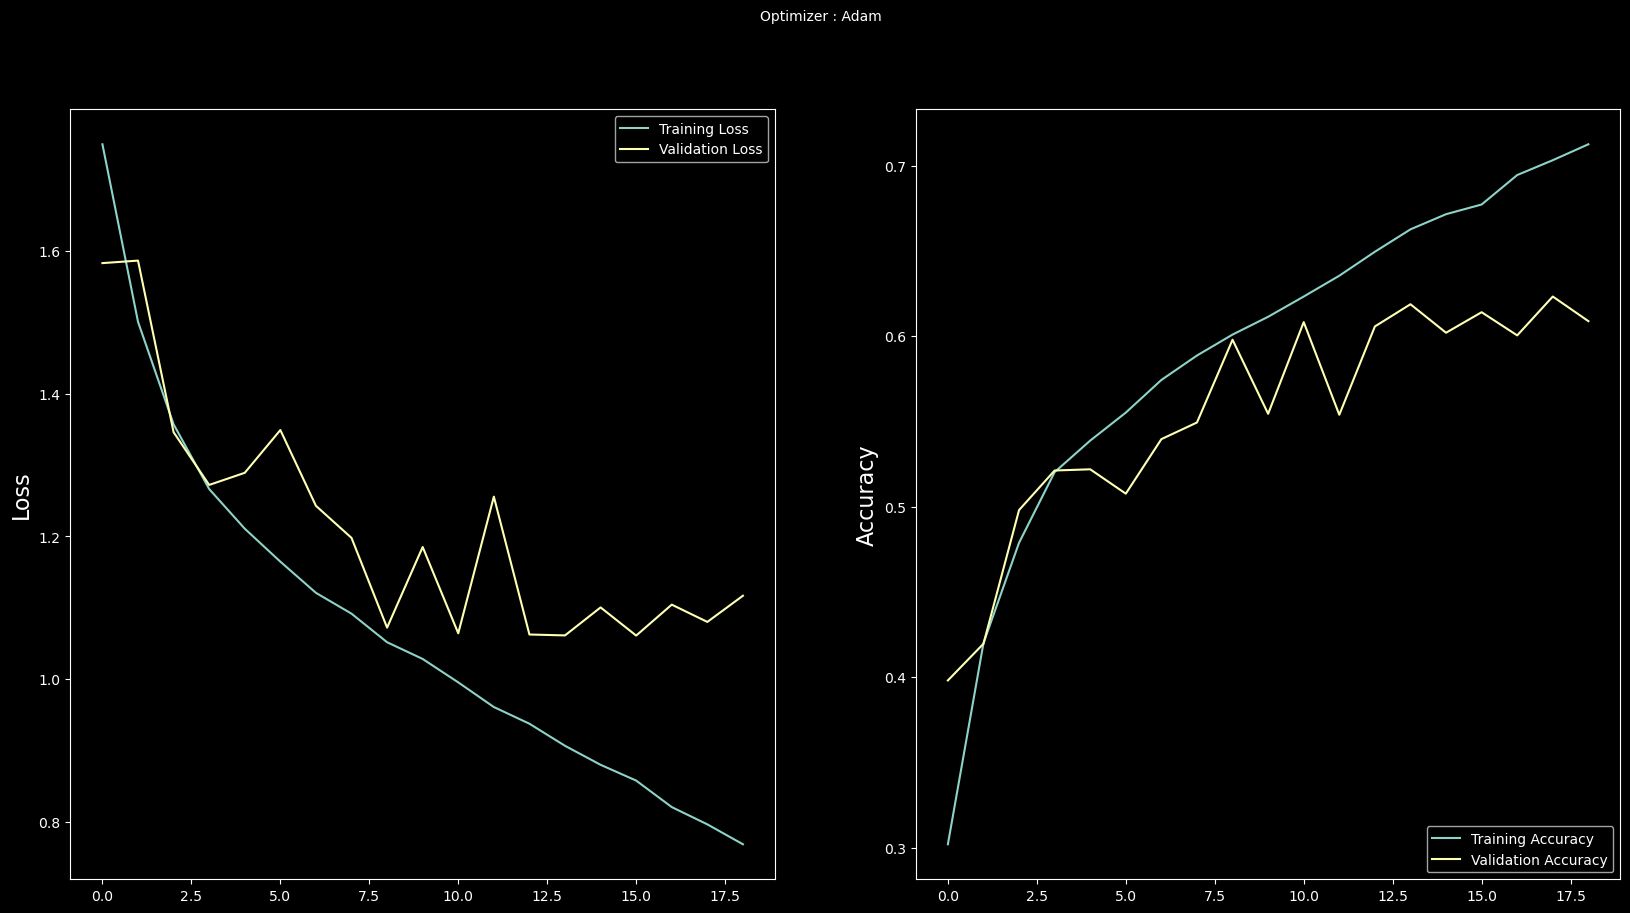

In [14]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
plt.figure(figsize=(10,10))